In [2]:
import sys
sys.path.append('../../')
import COLCRYAnalysis.make.crystal as cr
import COLCRYAnalysis.analysis.lattice as lt
import COLCRYAnalysis.analysis.potential as pp

# Sample Raw Crystal Lattice Generation using VMD

* Use provided generator class to make a crystal and use VMD to measure g(r)'s out to L/2


In [ ]:
vmd_path="/Applications/VMD\ 1.9.2.app/Contents/MacOS/startup.command"
generator = cr.Crystal(vmd_path)

* To get a large "usable" range, use 5 replicates of the unit cell to produce a supercell

In [11]:
nrepl = 5 

* Close pack the system to the following diameters

In [13]:
cp = {"sig_aa":1.0, "sig_ab":1.0, "sig_bb":1.0}

In [ ]:
generator.make('NaCl', nrepl, cp, "my_nacl")
generator.make('CsCl', nrepl, cp, "my_cscl")

* Note that now we have produced various "my_nacl*" and "my_cscl*" files
* Move these to some (raw) library directory for future use so library does not need to be regenerated, e.g., data/raw/

In [8]:
%ls 

example.ipynb   my_cscl_aa.rdf  my_nacl.tcl     my_nacl_ab.rdf
my_cscl.tcl     my_cscl_ab.rdf  my_nacl.xyz     my_nacl_bb.rdf
my_cscl.xyz     my_cscl_bb.rdf  my_nacl_aa.rdf


# Convert these to JSON files for Library, e.g., data/lib/

In [3]:
my_nacl = lt.Lattice()
my_nacl.assign(2, 3, [1,1], "NaCl equal diameters")
for (i,j,fn) in [(1,1,'my_nacl_aa.rdf'), (1,2,'my_nacl_ab.rdf'), (2,2,'my_nacl_bb.rdf')]:
    my_nacl.rdf_vmd2 (i,j,fn)
my_nacl.save_json('my_nacl.json')

In [32]:
my_cscl = lt.Lattice()
my_cscl.assign(2, 3, [1,1], "CsCl equal diameters")
for (i,j,fn) in [(1,1,'my_cscl_aa.rdf'), (1,2,'my_cscl_ab.rdf'), (2,2,'my_cscl_bb.rdf')]:
    my_cscl.rdf_vmd2 (i,j,fn)
my_cscl.save_json('my_cscl.json')

* We can examine the contents, for example

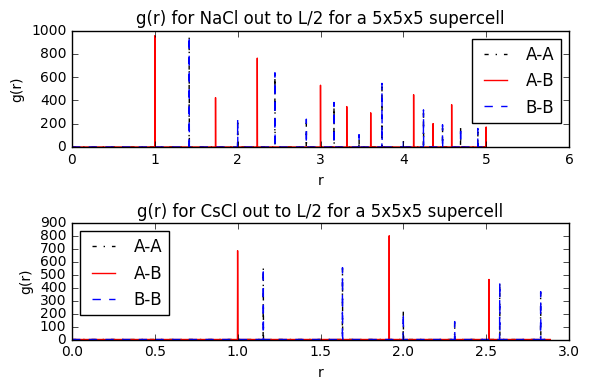

In [38]:
import matplotlib.pyplot as plt
import json
%matplotlib inline

for ctr, name,file in [(1,'NaCl', 'my_nacl.json'), (2,'CsCl', 'my_cscl.json')]:
    plt.subplot(2,1,ctr)
    f = open(file)
    info = json.load(f)
    f.close()
    
    # Note that i,j labels are indexes (i-1, j-1) if dealing with the raw data
    x = info['data']['rdf'][0][0]['r']
    y = info['data']['rdf'][0][0]['gr']
    plt.plot(x, y, 'k-.', label='A-A')

    x = info['data']['rdf'][0][1]['r']
    y = info['data']['rdf'][0][1]['gr']
    plt.plot(x, y, 'r', label='A-B')

    x = info['data']['rdf'][1][1]['r']
    y = info['data']['rdf'][1][1]['gr']
    plt.plot(x, y, 'b--', label='B-B')

    plt.legend(loc='best')
    plt.xlabel('r')
    plt.ylabel('g(r)')
    plt.title('g(r) for '+name+' out to L/2 for a 5x5x5 supercell')
plt.tight_layout()

# Energy Calculations & Sorting

* Can now deal with JSON files directly

In [2]:
NaCl = lt.Lattice('my_nacl.json')
CsCl = lt.Lattice('my_cscl.json')

* Choose some LJ-Lambda potentials for i-j pairs

In [3]:
for (i,j,u) in [(1,1,pp.LJLambda(1,1,1)), (1,2,pp.LJLambda(0,1,1)), (2,2,pp.LJLambda(-1,1,1))]:
    NaCl.set_potential (i,j,u.energy)
    CsCl.set_potential (i,j,u.energy)

* For a given bulk stoichiometry, compute energy of lattice assuming limiting reactant

In [28]:
bulk_stoich = [100, 100]
print NaCl.energy (bulk_stoich)
print CsCl.energy (bulk_stoich)

303.617077703
401.937532031


In [29]:
lattices = [CsCl, NaCl]
print NaCl < CsCl

True


* Lattices can be sorted from lowest to highest energy now

In [30]:
sorted_lattices = sorted(lattices, key=lambda x: x.data["energy"])
print [x.meta["name"] for x in sorted_lattices]

[u'NaCl equal diameters', u'CsCl equal diameters']
